In [1]:
import pandas as pd

data = pd.read_csv("/Users/fabiolipreri/Documents/Università/Magistrale/DatascienceFriday/datasets/DSGame/train.csv")
data.head()

,genre_id,ts_listen,media_id,album_id,context_type,release_date,platform_name,platform_family,media_duration,listen_type,user_gender,user_id,artist_id,user_age,is_listened
0,25471,1480597215,222606,41774,12,20040704,1,0,223,0,0,9241,55164,29,0
1,25571,1480544735,250467,43941,0,20060301,2,1,171,0,0,16547,55830,30,1
2,16,1479563953,305197,48078,1,20140714,2,1,149,1,1,7665,2704,29,1
3,7,1480152098,900502,71521,0,20001030,0,0,240,0,1,1580,938,30,0
4,7,1478368974,542335,71718,0,20080215,0,0,150,0,1,1812,2939,24,1


In [2]:
cat_data = ["media_id", "album_id", "user_gender", 
            "user_id", "context_type", "platform_name", "platform_family", "listen_type", "artist_id", "genre_id"]
num_data = ["media_duration", "release_date", "ts_listen", "user_age"]

cat_feat = pd.get_dummies(data[cat_data])
num_feat = data[num_data]
y = data["is_listened"]

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

X_cat_train, X_cat_test, y_cat_train, y_cat_test = train_test_split(cat_feat, y, test_size=0.30, random_state=42)

#X_cat_train.head()
print("Starting Random Forest")
print("Searching for best parameters...")
parameters = {'n_estimators':[30, 50, 100], 'min_samples_leaf':[2, 3, 4]} ## {'n_estimators': 15, 'min_samples_leaf': 30}
rf = RandomForestClassifier()
gridsearch = GridSearchCV(rf, parameters)
gridsearch.fit(X_cat_train, y_cat_train)
print("Best parameters: ", gridsearch.best_params_ )
#rf = clf.fit(X_cat_train, y_cat_train)
#pred = rf.predict(X_cat_test)
#print("Random Forest score: ", rf.score(X_cat_test, y_cat_test))

Starting Random Forest
Searching for best parameters...
Best parameters:  {'n_estimators': 15, 'min_samples_leaf': 30}


In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X_cat_train, X_cat_test, y_cat_train, y_cat_test = train_test_split(cat_feat, y, test_size=0.30, random_state=42)

rf = RandomForestClassifier(n_estimators=15, min_samples_leaf=30, n_jobs=-1)
rf.fit(X_cat_train, y_cat_train)
prediction = rf.predict_proba(X_cat_test)
print("Random Forest score: ", prediction)

Random Forest score:  [[ 0.1901388   0.8098612 ]
 [ 0.16770118  0.83229882]
 [ 0.4752082   0.5247918 ]
 ..., 
 [ 0.2208768   0.7791232 ]
 [ 0.29227771  0.70772229]
 [ 0.63305944  0.36694056]]


In [11]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_cat_test, prediction[:,1])

0.74782506568867879

In [24]:
test_set = pd.read_csv("/Users/fabiolipreri/Documents/Università/Magistrale/DatascienceFriday/datasets/DSGame/test.csv")
cat_feat_test = pd.get_dummies(test_set[cat_data])
test_pred = rf.predict_proba(cat_feat_test)
toSubmit = pd.concat([test_set['sample_id'], pd.Series(test_pred[:,1])],axis=1, keys=['sample_id', 'is_listened'])
toSubmit.to_csv('../solution.csv', index=False)

In [15]:
from sklearn.neural_network import MLPClassifier

X_num_train, X_num_test, y_num_train, y_num_test = train_test_split(num_feat, y, test_size=0.30, random_state=42)

print("Inizio Neural Network")
nn = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
nn.fit(X_num_train, y_num_train)
print("Neural Network score: ", nn.score(X_num_test, y_num_test))



Inizio Neural Network
Neural Network score:  0.31619018976


In [25]:
data.shape, test_set.shape

((7558834, 15), (19918, 15))

In [43]:
# train and test set have the same users
train_users = data.user_id.unique()
test_users = test_set.user_id.unique()
sum(train_users - test_users)

0

In [57]:
counter = data.groupby(by='user_id')['media_id'].count()

In [108]:
x = counter.unique()[::-1]

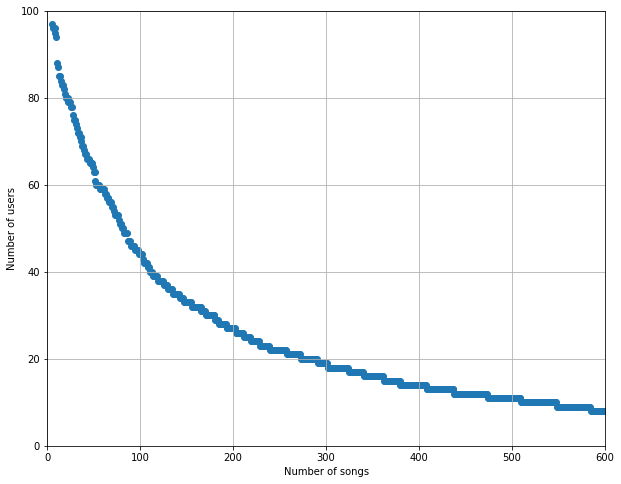

In [115]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.scatter(x, counter.value_counts())
plt.xlabel('Number of songs')
plt.ylabel('Number of users')
plt.xlim([0,600])
plt.ylim([0,100])
plt.grid(True)
plt.show()

In [29]:
test_set.user_id.nunique()

19918

In [ ]:
pd.concat